<a href="https://colab.research.google.com/github/BognarAndras/BLK_Girls_day_2023/blob/main/Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/data/listings.csv.gz")

In [4]:
# !pip install -U seaborn

In [5]:
data['price_clean'] = data['price'].apply(lambda x: int(round(float(x.strip('$').replace(",","")))))

In [6]:
data[['price','price_clean']]

,price,price_clean
0,$350.00,350
1,$100.00,100
2,$266.00,266
3,$624.00,624
4,"$1,899.00",1899
...,...,...
30471,$242.00,242
30472,$118.00,118
30473,"$1,126.00",1126
30474,"$1,126.00",1126


NameError: ignored

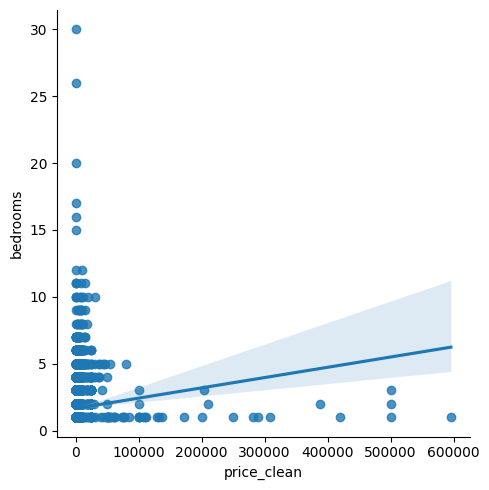

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(data=data,x='price_clean',y='bedrooms')
sns.set(rc={"figure.figsize":(10,5)})
plt.xlabel('Price of Airbnb')
plt.ylabel('Number of bedrooms')

In [1]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00


In [16]:

%%writefile app.py
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

@st.cache_data()
def get_data():
  data = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/data/listings.csv.gz")
  return(data)

df = get_data()


st.sidebar.header('select features')

@st.cache_data()
def mod_data(df):
  df['price_clean'] = df['price'].apply(lambda x: int(round(float(x.strip('$').replace(",","")))))
  return(df[['price_clean','bedrooms']])
df = mod_data(df)

@st.cache_resource()
def get_plot(df):
  fig = sns.lmplot(data=df,x='price_clean',y='bedrooms')
  sns.set(rc={"figure.figsize":(10,5)})
  plt.xlabel('Price of Airbnb')
  plt.ylabel('Number of bedrooms')
  return(fig)
fig = get_plot(df)

st.pyplot(fig)





Overwriting app.py


In [17]:
!streamlit run app.py & npx localtunnel --port 8501

[############......] / finalize:openurl: sill finalize /root/.npm/_npx/10233/li


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.34.135:8501

npx: installed 22 in 4.785s
your url is: https://slick-cobras-occur-34-147-34-135.loca.lt
  Stopping...
^C
